
# **Algoritmo Genético para Planificación de Rutas** 🧬🗺️

----

Este trabajo presenta una implementación del algoritmo genético destinado a encontrar la ruta más óptima entre dos puntos, incluso cuando hay obstáculos intermedios. La estrategia se basa en utilizar los puntos de ruta disponibles en el espacio para este propósito. Para visualizar la simulación, se recurrió a la biblioteca Matplotlib. Cabe destacar que se ha recibido inspiración y apoyo del proyecto genetic-algorithm-shortest-path de rofe-dl (consultar su repositorio en https://github.com/rofe-dl/genetic-algorithm-shortest-path). 🚀🔍

## **I. Importación de Bibliotecas** 📚✨



In [1]:
import math                                                     # Importamos el módulo math, que nos permite usar funciones matemáticas.
from random import randint                                      # Importamos la función randint del módulo random, que nos permite generar números aleatorios.
from shapely.geometry import Polygon, LineString                # Importamos las clases Polygon y LineString del módulo shapely.geometry, que nos permiten crear polígonos y líneas.
from utils.plotter import plot                                  # Importamos la función plotter del módulo utils.plotter, que nos permite visualizar la simulación.
from config.config_parser import parser                         # Importamos el parser, nos permite leer el archivo de configuración.
from utils.obstacle_generator import generate_obstacles         # Importamos la función generate_obstacles del módulo utils.obstacle_generator, que nos permite generar obstáculos.
from utils.path_point_generator import generate_path_points     # Importamos la función generate_path_points del módulo utils.path_point_generator, que nos permite generar puntos de ruta.
import numpy as np                                              # Importamos la biblioteca numpy, que nos permite trabajar con matrices y vectores.
from utils.plotter import _plot_evolution                       # Importamos la función _plot_evolution del módulo utils.plotter, que nos permite visualizar la evolución de la población.

## **II. Creación de las Funciones Necesarias para Implementar el Algoritmo Genético** **🧬🛠️**

### **1. Definición de la Función para generar cromosomas 🧬🌱:**

In [2]:
# Definimos la funcion para generar cromosomas, recibe como parametro los puntos de la ruta y la validez de la ruta.
def generar_cromosoma(puntos_ruta, validez_ruta):

    # Inicializamos el cromosoma con el punto de inicio.
    cromosoma = '1' # el origen siempre se visita

    # Inicializamos el punto de ruta previo con el primer punto de la ruta.
    punto_ruta_previo = puntos_ruta[0] # mantenemos un seguimiento del punto de ruta previo que fue 1

    # Iteramos sobre los puntos de la ruta.
    for i in range(1, len(puntos_ruta)):

        # Obtenemos el punto de la ruta.
        punto_ruta = puntos_ruta[i]

        # Si el punto de la ruta actual es el último y no es válido, retornamos falso.
        if i == (len(puntos_ruta) - 1) and not validez_ruta[punto_ruta_previo][i]:
            return False

        # Si el punto de la ruta actual es válido.
        if validez_ruta[punto_ruta_previo][i]:

            # Si el punto de la ruta actual es el último.
            if i == (len(puntos_ruta) - 1):
                gen = '1'

            # Si el punto de la ruta actual no es el último.
            else:
                gen = '0' if randint(1, 10) > 5 else '1'

            # Si el gen es 1, actualizamos el punto de ruta previo.
            if gen == '1':
                punto_ruta_previo = punto_ruta


            # Agregamos el gen al cromosoma.
            cromosoma += gen

        else:

            # Si el punto de la ruta actual no es válido, agregamos un 0 al cromosoma.
            cromosoma += '0'

    # Retornamos el cromosoma.
    return cromosoma

### **2. Definición de la función para identificar si se ha encotrado un obstaculo 🧬🌱:**

In [3]:
# Definimos la función para verificar si la ruta se superpone con un obstáculo, recibe como parámetros el punto de la ruta 1, el punto de la ruta 2 y los obstáculos.
def ruta_se_superpone_obstaculo(punto_ruta_1, punto_ruta_2, obstáculos):

    # Creamos una línea con los puntos de la ruta.
    ruta = LineString([punto_ruta_1, punto_ruta_2])

    # Iteramos sobre los obstáculos.
    for obstáculo in obstáculos:

        # Creamos un polígono con el obstáculo.
        obstáculo = Polygon(obstáculo)

        # Si la ruta se superpone con el obstáculo, retornamos verdadero.
        if ruta.intersects(obstáculo):
            return True

    # Retornamos falso si la ruta no se superpone con ningún obstáculo.
    return False

### **3. Definición de la función para verificar que el   cromosoma es valido 🧬🌱:**

In [4]:
# Definimos la función para verificar si el cromosoma es válido, recibe como parámetros el cromosoma, los obstáculos y los puntos de la ruta.
def cromosoma_valido(cromosoma, obstáculos, puntos_ruta):

    # Inicializamos los puntos de la ruta 1 y 2.
    punto_ruta_1, punto_ruta_2 = (), ()

    # Iteramos sobre los genes del cromosoma.
    for i, gen in enumerate(cromosoma):

        # Si el gen es 1.
        if gen == '1':

            # Si no hay un punto de la ruta 1, asignamos el punto de la ruta actual.
            if not punto_ruta_1:
                punto_ruta_1 = puntos_ruta[i]

            # Si hay un punto de la ruta 1, asignamos el punto de la ruta actual al punto de la ruta 2.
            else:
                punto_ruta_2 = puntos_ruta[i]

            # Si hay un punto de la ruta 1 y un punto de la ruta 2.
            if punto_ruta_1 and punto_ruta_2:


                # Si la ruta se superpone con un obstáculo, retornamos falso.
                if ruta_se_superpone_obstaculo(punto_ruta_1, punto_ruta_2, obstáculos):
                    return False


                # Actualizamos el punto de la ruta 1 y el punto de la ruta 2.
                punto_ruta_1 = punto_ruta_2

                # Reiniciamos el punto de la ruta 2.
                punto_ruta_2 = ()

    # Retornamos verdadero.
    return True

### **4. Definición de la función para Generar la Población Inicial y las Subsiguientes Generaciones 🧬🌱:**

In [5]:
# De parametro recibe los puntos de la ruta, los obstáculos y la validez de la ruta.
def generar_poblacion(puntos_ruta, obstáculos, validez_ruta):


    # Obtenemos el tamaño de la población del archivo de configuración.
    tamaño_poblacion = int(parser['Genetic Algorithm']['population_size'])

    # Creamos una lista vacía para almacenar la población.
    poblacion = []

    # Imprimimos un mensaje en consola, para indicar que se está generando la población inicial.
    print('Generando población inicial, por favor espere ....')

    # Iteramos sobre el tamaño de la población.
    for i in range(tamaño_poblacion):

        # Creamos un cromosoma, si el cromosoma no es válido, lo volvemos a crear.
        while True:
            cromosoma = generar_cromosoma(puntos_ruta, validez_ruta)
            if cromosoma:
                break

        # Agregamos el cromosoma a la población.
        poblacion.append(cromosoma)

    # Imprimimos un mensaje en consola, para indicar que la población inicial ha sido creada con éxito.
    print('Población inicial creada con éxito')

    # Imprimimos un mensaje en consola, para indicar que se está simulando el algoritmo genético para la planificación de la ruta.
    print('Simulando algoritmo genético para planificación de ruta .... (Presione Ctrl+C para detener)')


    # Retornamos la población.
    return poblacion

### **5. Definición de la función para operar la mutación sobre un cromosoma🧬🌱:**

In [6]:
# Definimos la función para operar la mutación, recibe como parámetro el cromosoma.
def mutacion(cromosoma):

    # Obtenemos un índice aleatorio.
    indice = randint(1, len(cromosoma) - 2) # no mutaremos los genes de inicio y fin

    # Convertimos el cromosoma en una lista.
    cromosoma = list(cromosoma)

    # Mutamos el gen en el índice aleatorio.
    cromosoma[indice] = '1' if  cromosoma[indice] == '0' else '0'

    # Retornamos el cromosoma, convertido en una cadena.
    return ''.join(cromosoma)

### **6. Definición de la función para calcular la distancia euclidiana entre dos puntos de la ruta 🧬🌱:**

In [7]:
# Definimos la función para calcular la distancia euclidiana entre dos puntos de la ruta, recibe como parámetros el punto de la ruta 1 y el punto de la ruta 2.
def distancia(punto_ruta_1, punto_ruta_2):

    # Retornamos la distancia euclidiana entre los dos puntos de la ruta.
    return math.sqrt( (punto_ruta_2[0] - punto_ruta_1[0])**2 + (punto_ruta_2[1] - punto_ruta_1[1])**2 )

### **7. Definición de la función para calcular la longitud total del cromosoma 🧬🌱:**

In [8]:
# Definimos la función para calcular la longitud de la ruta, recibe como parámetros el cromosoma y los puntos de la ruta.
def calcular_longitud_ruta(cromosoma, puntos_ruta):

    # Inicializamos los puntos de la ruta 1 y 2, y la longitud.
    punto_ruta_1, punto_ruta_2 = (), ()
    longitud = 0

    # Iteramos sobre los genes del cromosoma.
    for i, gen in enumerate(cromosoma):

        # Si el gen es 1.
        if gen == '1':

            # Si no hay un punto de la ruta 1, asignamos el punto de la ruta actual.
            ultimo_punto_ruta = puntos_ruta[i]

            # Si no hay un punto de la ruta 1, asignamos el punto de la ruta actual.
            if not punto_ruta_1:
                punto_ruta_1 = puntos_ruta[i]

            # Si hay un punto de la ruta 1, asignamos el punto de la ruta actual al punto de la ruta 2.
            else:
                punto_ruta_2 = puntos_ruta[i]

            # Si hay un punto de la ruta 1 y un punto de la ruta 2.
            if punto_ruta_1 and punto_ruta_2:


                # Calculamos la distancia entre los dos puntos de la ruta.
                longitud += distancia(punto_ruta_1, punto_ruta_2)

                # Actualizamos el punto de la ruta 1 y el punto de la ruta 2.
                punto_ruta_1 = punto_ruta_2

                # Reiniciamos el punto de la ruta 2.
                punto_ruta_2 = ()

    # Retornamos la longitud de la ruta.
    return longitud

### **8. Definición de la función para calcular el fitness 🧬🌱:**

In [9]:
# Definimos la función para calcular el fitness, recibe como parámetros el cromosoma y los puntos de la ruta.
def fitness(cromosoma, puntos_ruta):

    # Calculamos la longitud de la ruta.
    longitud = calcular_longitud_ruta(cromosoma, puntos_ruta)

    # Calculamos el fitness, donde el fitness es igual a 1 dividido por la longitud de la ruta, si la longitud de la ruta es diferente de 0, de lo contrario, el fitness es igual a 0.
    fitness = 1 / longitud if longitud != 0 else 0

    # Retornamos el fitness.
    return fitness

### **9. Definición de la función para organizar la población con respecto a la función fitness como lista de prioridad (de mayor a menor probabilidad) 🧬🌱:**

In [10]:
# Definimos la función para ordenar la población por fitness, recibe como parámetros la población y los puntos de la ruta.
def ordenar_por_fitness(población, puntos_ruta):

    # Creamos una lista vacía para almacenar el fitness.
    lista_fitness = []

    # Iteramos sobre los cromosomas en la población.
    for cromosoma in población:

        # Calculamos el fitness del cromosoma.
        cromosoma_a_fitness = (cromosoma, fitness(cromosoma, puntos_ruta))

        # Agregamos el cromosoma y el fitness a la lista de fitness.
        lista_fitness.append(cromosoma_a_fitness)


    # Ordenamos la lista de fitness en orden descendente, es decir, de mayor probabilidad a menor probabilidad según el fitness.
    lista_fitness.sort(reverse=True, key=lambda tupla: tupla[1])

    # Retornamos la lista de fitness.
    return lista_fitness

### **10. Definición de la función para realizar el cruce entre dos cromosomas padres 🧬🌱:**

In [11]:
# Definimos la función para realizar el cruce, recibe como parámetros el padre 1 y el padre 2.
def cruce(padre1, padre2):

    # Si el cruce se realiza de forma aleatoria.
    if parser['Genetic Algorithm'].getboolean('crossover_split_random'):
        tamano_division = randint(0, len(padre1))

    # Si  el cruce se realiza de forma del tamaño de la fracción.
    else:
        fracción = float(parser['Genetic Algorithm']['crossover_split_size'])
        tamano_division = math.floor(fracción * len(padre1))

    # Retornamos el hijo, que es igual a la concatenación de la primera mitad del padre 1 y la segunda mitad del padre 2.
    return ''.join([padre1[:tamano_division], padre2[tamano_division:]])

### **10. Definición de la función para realizar la selección aleatoria del cromosoma para la siguiente descendencia 🧬🌱:**

In [12]:
# Definimos la función para elegir un padre aleatorio, recibe como parámetro la lista de fitness.
def elegir_padre_aleatorio(lista_fitness):

    # Obtenemos el índice hasta el cual se seleccionará el padre.
    hasta_indice = len(lista_fitness) * float(parser['Genetic Algorithm']['top_percentage'])

    # Redondeamos el índice hasta el entero más cercano.
    hasta_indice = math.floor(hasta_indice)

    # Elegimos un padre aleatorio de la lista de fitness.
    padre_a_fitness = lista_fitness[randint(0, hasta_indice)]

    # Retornamos el padre.
    return padre_a_fitness[0]

### **11. Definición de la función para ejecutar el algoritmo genético 🧬🌱:**

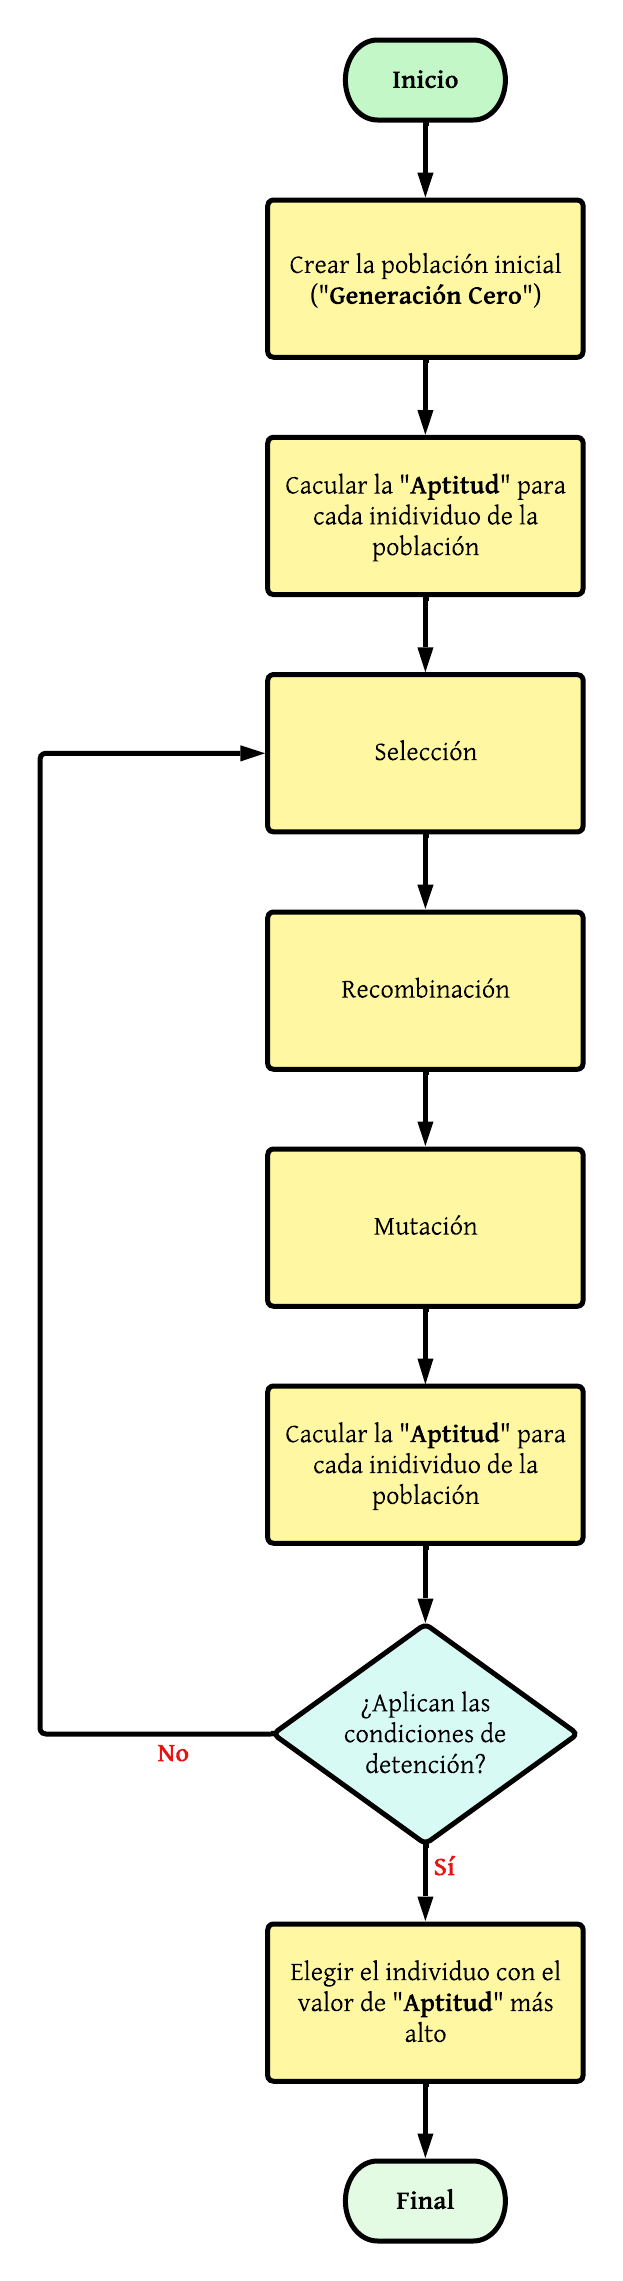

In [13]:
# Definimos la función para ejecutar el algoritmo genético, recibe como parámetros los obstáculos, los puntos de la ruta y la validez de la ruta.
def iniciar(obstaculos, puntos_ruta, validez_ruta):

    # Generamos la población inicial:
    poblacion = generar_poblacion(puntos_ruta, obstaculos, validez_ruta)

    # Creamos una lista vacía para almacenar las longitudes de la ruta.
    longitudes_ruta = []


    # Calculamos la longitud de la ruta para cada cromosoma en la población y, la almacenamos en la lista de longitudes de la ruta.
    for cromosoma in poblacion:
        longitudes_ruta.append(calcular_longitud_ruta(cromosoma, puntos_ruta))


    # Imprimimos en la pantalla una gráfica con la población inicial.
    plot(obstaculos, puntos_ruta, poblacion, longitudes_ruta, 1, False)

    # Obtenemos el número de generaciones del archivo de configuración.
    generaciones = int(parser['Genetic Algorithm']['max_generations'])
    
    # Lista para almacenar las longitudes medias de las rutas por generación
    evolution_data = []

    # Iteramos sobre el número de generaciones.
    for gen in range(generaciones - 1):

        # Creamos una lista vacía para almacenar la nueva población.
        nueva_poblacion = []

        # Limpiamos la lista de longitudes de la ruta.
        longitudes_ruta.clear()

        # Ordenamos la población por fitness:
        lista_fitness = ordenar_por_fitness(poblacion, puntos_ruta)

        # Iteramos sobre la población:
        for cromosoma in poblacion:

            # Creamos un bucle infinito, mientras no se genere un hijo válido.
            while True:
                padre1 = elegir_padre_aleatorio(lista_fitness)
                padre2 = elegir_padre_aleatorio(lista_fitness)

                hijo = cruce(padre1, padre2)

                if randint(1, 10) <= 10 * float(parser['Genetic Algorithm']['mutation_probability']):
                    hijo = mutacion(hijo)

                if cromosoma_valido(hijo, obstaculos, puntos_ruta):
                    break

            # Si el hijo es válido, calculamos la longitud de la ruta y la agregamos a la lista de longitudes de la ruta.
            longitudes_ruta.append(calcular_longitud_ruta(hijo, puntos_ruta))
            
            # Calculamos la longitud media de las rutas y la agregamos a la lista de evolución
            evolution_data.append(np.mean(longitudes_ruta))

            # Agregamos el hijo a la nueva población.
            nueva_poblacion.append(hijo)

        # Actualizamos la población, por su descendencia:
        poblacion = nueva_poblacion

        # Imprimimos en la pantalla una gráfica con la población actual:
        plot(obstaculos, puntos_ruta, nueva_poblacion, longitudes_ruta, (gen+2), last_gen=True if gen == generaciones-2 else False )
    
    # Al finalizar el bucle, mostramos la gráfica final y la evolución de las longitudes del camino
    _plot_evolution(evolution_data)

In [14]:

# Definimos la función para distribuir los puntos de la ruta de forma aleatoria.
def puntos_iniciales_de_la_ruta():

    # Si la opción de generar puntos de la ruta aleatoriamente está activada en el archivo de configuración.
    if parser['Path Points'].getboolean('generate_randomly'):
        
        # Generamos los puntos de la ruta de forma aleatoria.
        generate_path_points(path_points, obstacles)

    else:
        
        # Si no, se obtienen los puntos de la ruta del archivo de configuración.
        for element in eval(parser['Hardcoded Path Points']['path_points']):
            
            # Se agregan los puntos de la ruta a la lista de puntos de la ruta.
            path_points.append(element)

In [15]:
def inicializar_obstaculos():

    # Si la opción de generar obstáculos aleatoriamente está activada en el archivo de configuración.
    if parser['Obstacles'].getboolean('generate_randomly'):
        
        # Se obtiene el número de obstáculos del archivo de configuración.
        number_of_obstacles = int(parser['Obstacles']['number_of_obstacles'])
        
        # Se generan los obstáculos de forma aleatoria.
        generate_obstacles(obstacles, number_of_obstacles)

    else:
        
        # Si no, se obtienen los obstáculos del archivo de configuración.
        for i in range(int(parser['Hardcoded Obstacles']['number_of_hardcoded_obstacles'])):
            
            # Se agregan los obstáculos a la lista de obstáculos.
            obstacle = eval(parser['Hardcoded Obstacles'][f"obstacle_{i+1}"])
            
            # Se agregan los obstáculos a la lista de obstáculos.
            obstacles.append(obstacle)

In [16]:

# Definimos la función para inicializar la validez de la ruta.
def inicializar_validez_de_ruta():
    
    # Iteramos sobre los puntos de la ruta.
    for i, path_point_start in enumerate(path_points):

        # Si el punto de inicio de la ruta no está en la validez de la ruta.
        if path_point_start not in path_validity:
            path_validity[path_point_start] = [True] * len(path_points)

        # Iteramos sobre los puntos de la ruta.
        for j, path_point_end in enumerate(path_points):

            # Si el punto de fin de la ruta no está en la validez de la ruta.
            if path_point_end not in path_validity:
                
                # Se agrega el punto de fin de la ruta a la validez de la ruta.
                path_validity[path_point_end] = [True] * len(path_points)

            # Si la ruta se superpone con un obstáculo.
            if ruta_se_superpone_obstaculo(path_point_start, path_point_end, obstacles):
                
                # Se establece la validez de la ruta en falso.
                path_validity[path_point_start][j] = False
                
                # Se establece la validez de la ruta en falso.
                path_validity[path_point_end][i] = False

In [17]:

# Inicializamos las ubicaciones de los obstáculos:
obstacles = []

# Inicializamos las ubicaciones de los puntos de la ruta:
path_points = []

# Inicializamos la validez de la ruta:
path_validity = dict()

# Inicializamos el parser para leer el archivo de configuración:
parser.read('../config/config.ini')

['../config/config.ini']

In [18]:
# Inicializamos los obstáculos:
inicializar_obstaculos()   

Generando obstáculos ....


In [19]:
# Inicializamos los puntos de la ruta:
puntos_iniciales_de_la_ruta()

Generando puntos de ruta ....


In [20]:
# Inicializamos la validez de la ruta:
inicializar_validez_de_ruta()

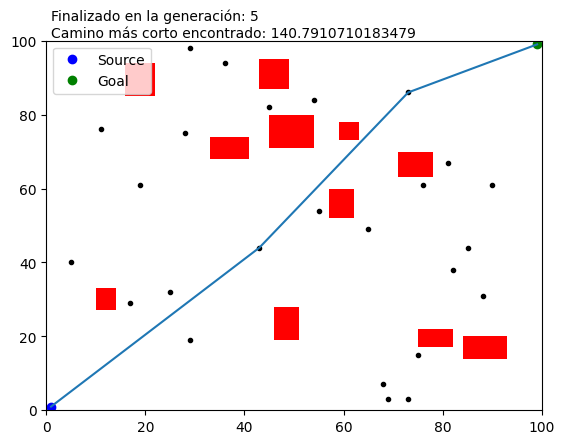

¡Listo! Camino más corto encontrado.


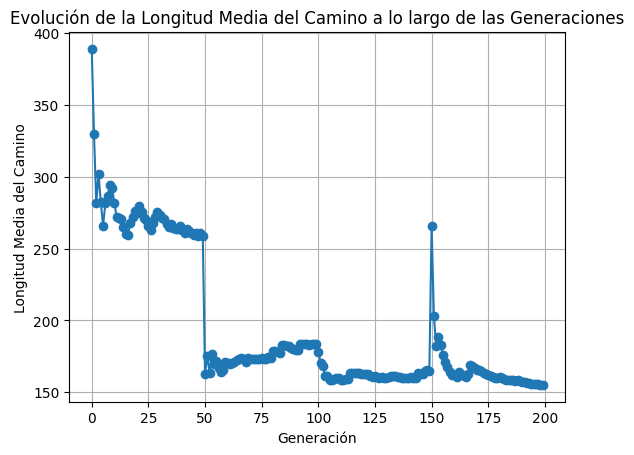

In [21]:
# Ejecutamos el algoritmo genético:
iniciar(obstacles, path_points, path_validity)